# Численные методы решения уравнения перенос

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fillValues(x, size, Step):
    x.append(0)
    for i in range(size - 1):
        x.append(x[i] + Step)

def U0(x):
# Треугольник
    if (x <= 0.5) and (x >= 0.4):
        return 10*x-4 
    elif (x<=0.6) and (x>=0.5):
        return -10*x + 6
    else:
        return 0 

#Ступенька
#    if (x <= 0.6) and (x >= 0.4):
#        return 1
#    else:
#        return 0

#Полуэллипс
#    if (x <= 0.6) and (x >= 0.4):
#        return np.sqrt(1 - 100*((x-0.5)**2))
#    else:
#        return 0

def U1(x): 
    return 0

def Double_Hybrid(U_1,U_2,U_3,U_4):
    if (U_1 - U_3 < 0) and (U_2 > U_1) and (U_2 < U_3):
            return U_2
    elif (U_1 - U_3 > 0) and (U_2 < U_1) and (U_2 > U_3):
            return U_2
    else:
        return U_4
    
def Triple_Hybrid(U_1,U_2,U_3,U_4,U_5):
    if (U_1 - U_3 < 0) and (U_2 > U_1) and (U_2 < U_3):
        return U_2
    elif (U_1 - U_3 > 0) and (U_2 < U_1) and (U_2 > U_3):
        return U_2
    elif (U_1 - U_3 < 0) and (U_5 > U_1) and (U_5 < U_3):
          return U_5
    elif (U_1 - U_3 > 0) and (U_5 < U_1) and (U_5 > U_3):
        return U_5
    else:
        return U_4

c = 1
L = 2.
T = 1.
gridWidth = 200
gridHeight = 200
xStep = L/gridWidth
tau = T/gridHeight 
Q = c*tau/xStep
a1 = 2*(1+Q-2*(Q**2))/((1+Q)*(2*Q+1))
a2 = 2*Q/(1+Q)
a3 = (Q-1)/((1+Q)*(2*Q+1))
a4 = 2*Q*(Q-1)/((Q+1)*(2*Q+1))

if (Q < 1):
    print("ЕСТЬ СХОДИМОСТЬ")
else:
    print("НЕТ СХОДИМОСТИ")  

ЕСТЬ СХОДИМОСТЬ
0.666666666667 0.666666666667 -0.166666666667 -0.166666666667


In [2]:
x =[]
t = []
U_real = []

fillValues(x, gridWidth, xStep)
fillValues(t, gridHeight, tau)

for i in range(gridWidth):
    U_real.append(U0(x[i] - c*t[-1]))

## Четыре монотонные схемы первого порядка аппроксимации

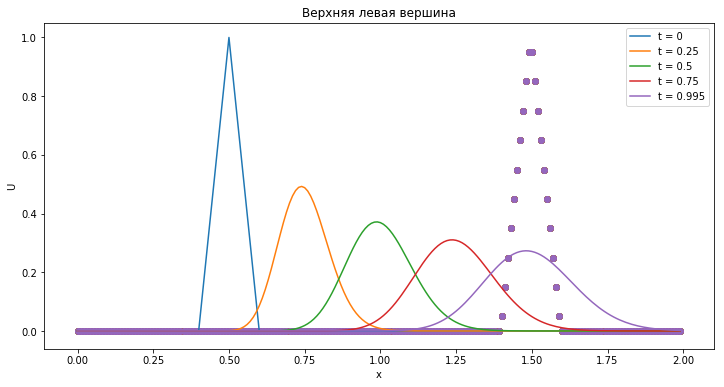

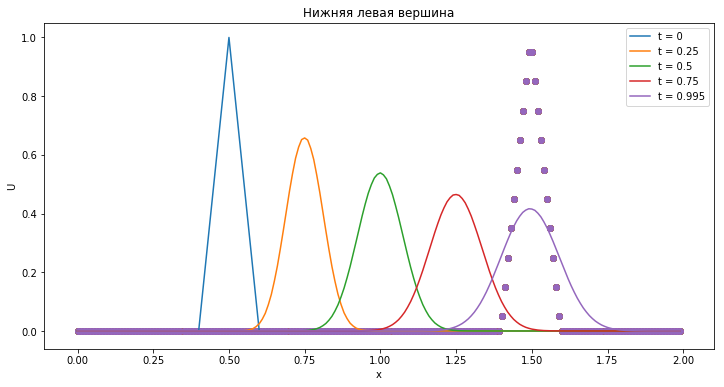

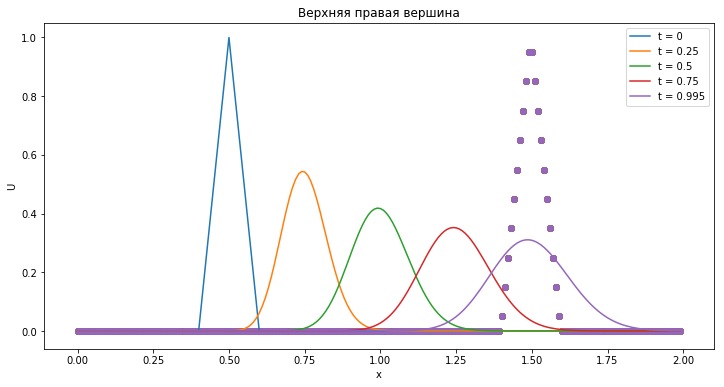

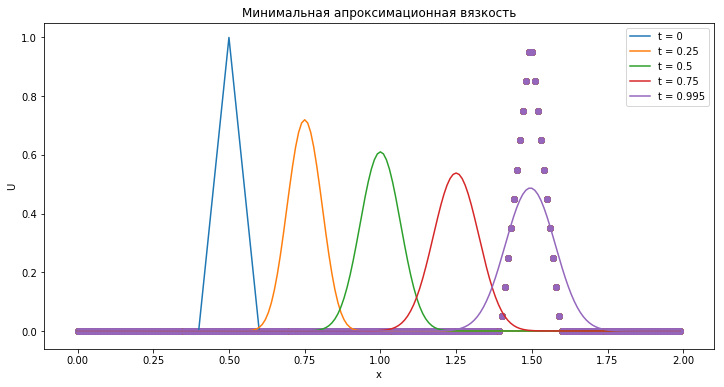

In [3]:
# Начальные и граничные условия
U = np.zeros((gridWidth,gridHeight))

plt.figure(figsize = (12,6))

for i in range(gridWidth):
    U[i][0] = U0(x[i])
    
for j in range(gridHeight):
    U[0][j] = U1(t[j])

# Схема1 
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U[i][j+1] = 1./2 *U[i][j-1] + 1./2 *U[i-1][j+1]

# Рисунок1
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Верхняя левая вершина')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (12,6))

# Схема2
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U[i][j+1] = 2./3 *U[i-1][j] + 1./3 *U[i][j-1]

# Рисунок2
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Нижняя левая вершина')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (12,6))

# Схема3
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U[i][j+1] = 2./3 *U[i][j] + 1./3 *U[i-1][j+1]

# Рисунок3
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Верхняя правая вершина')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (12,6))
                                                 
# Схема4
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U[i][j+1] = 1./2 *U[i][j] + 1./2 *U[i-1][j]

# Рисунок4
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Минимальная апроксимационная вязкость')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

## Схема наименее осциллирующая на разрывных решениях второго порядка аппроксимации


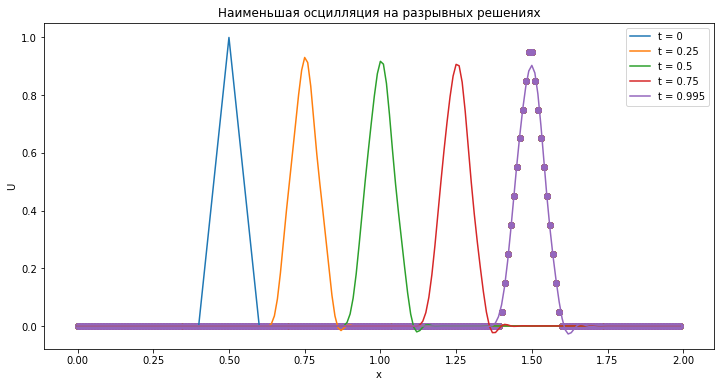

In [4]:
# Начальные и граничные условия
U = np.zeros((gridWidth,gridHeight))

plt.figure(figsize = (12,6))

for i in range(gridWidth):
    U[i][0] = U0(x[i])
    
for j in range(gridHeight):
    U[0][j] = U1(t[j])

# Схема 
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U[i][j+1] = 3./5 *U[i][j] + 11./15 *U[i-1][j] - 2./15 *U[i][j-1] - 1./5 *U[i-1][j+1]
        
# Рисунок
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Наименьшая осцилляция на разрывных решениях')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

## Две схемы второго порядка аппроксимации

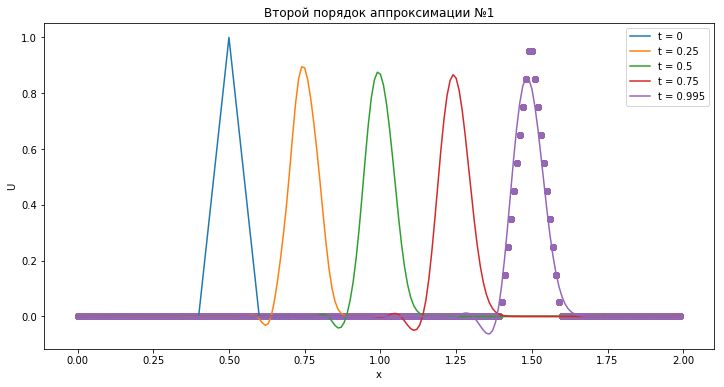

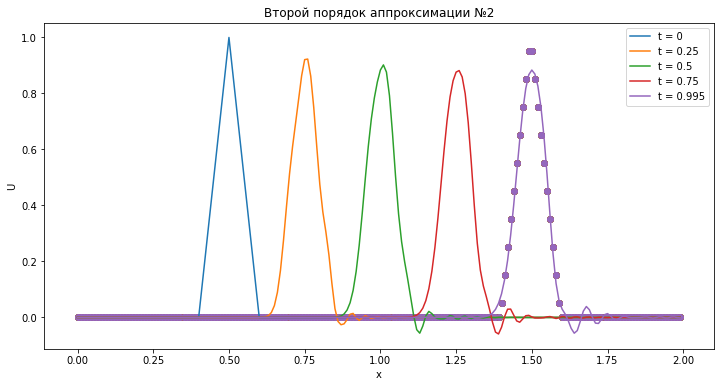

In [5]:
# Начальные и граничные условия
U = np.zeros((gridWidth,gridHeight))

for i in range(gridWidth):
    U[i][0] = U0(x[i])
    
for j in range(gridHeight):
    U[0][j] = U1(t[j])

# Схема1
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U[i][j+1] = U[i][j] + 1./3 *U[i-1][j] -1./3 *U[i][j-1]
        
plt.figure(figsize = (12,6))

# Рисунок1
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Второй порядок аппроксимации №1')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

# Схема2
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U[i][j+1] = 2./5 * U[i][j] + 14./15 *U[i-1][j] - 1./30 * U[i][j-1] - 3./10 * U[i-1][j+1]
        
plt.figure(figsize = (12,6))

# Рисунок2
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Второй порядок аппроксимации №2')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

## Схема третьего порядка аппроксимации

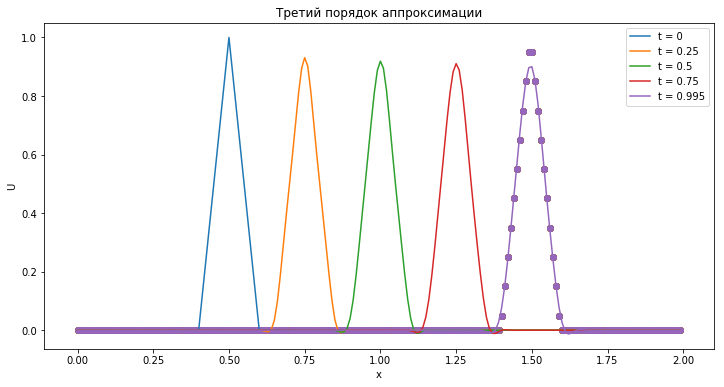

In [6]:
# Начальные и граничные условия
U = np.zeros((gridWidth,gridHeight))

for i in range(gridWidth):
    U[i][0] = U0(x[i])
    
for j in range(gridHeight):
    U[0][j] = U1(t[j])

# Схема 
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U[i][j+1] = a1*U[i][j] + a2*U[i-1][j] + a3*U[i][j-1] + a4*U[i-1][j+1]
        
plt.figure(figsize = (12,6))

# Рисунок
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Третий порядок аппроксимации')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

## Гибридная схема с использованием двух схем второго порядка аппроксимации

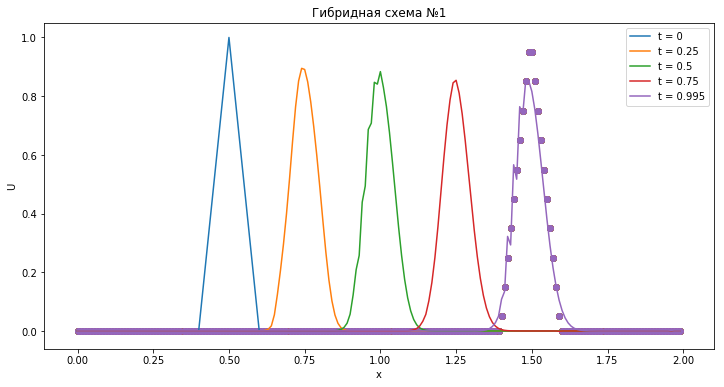

In [7]:
# Начальные и граничные условия
U = np.zeros((gridWidth,gridHeight))
U_1 = np.zeros((gridWidth,gridHeight))
U_2 = np.zeros((gridWidth,gridHeight))

for i in range(gridWidth):
    U[i][0] = U0(x[i])
    U_1[i][0] = U0(x[i])
    U_2[i][0] = U0(x[i])
    
for j in range(gridHeight):
    U[0][j] = U1(t[j])
    U_1[0][j] = U1(t[j])
    U_2[0][j] = U1(t[j])

# Схема
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    U_1[i][1] = (1 - Q)*U_1[i][0] + Q*U_1[i-1][0]
    U_2[i][1] = (1 - Q)*U_2[i][0] + Q*U_2[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U_1[i][j+1] = U_1[i][j] + 1./3 *U_1[i-1][j] -1./3 *U_1[i][j-1]
        U_2[i][j+1] = 2./5 * U_2[i][j] + 14./15 *U_2[i-1][j] - 1./30 * U_2[i][j-1] - 3./10 * U_2[i-1][j+1]
        U[i][j+1] = Double_Hybrid(U[i-1][j], U_1[i][j+1], U[i][j], U_2[i][j+1])

plt.figure(figsize = (12,6))

# Рисунок
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Гибридная схема №1')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

## Гибридные схемы с использованием схем второго порядка аппроксимации и схемы третьего порядка аппроксимации

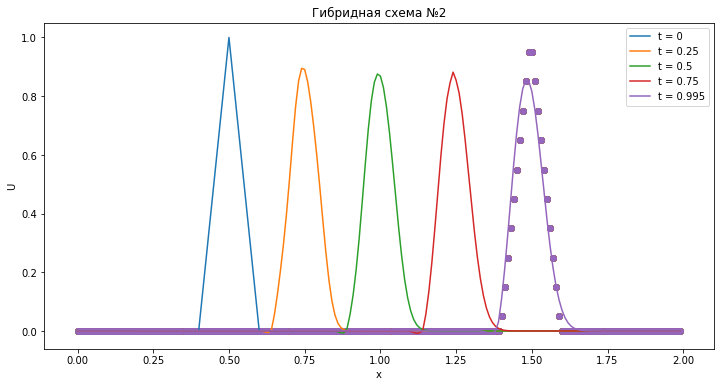

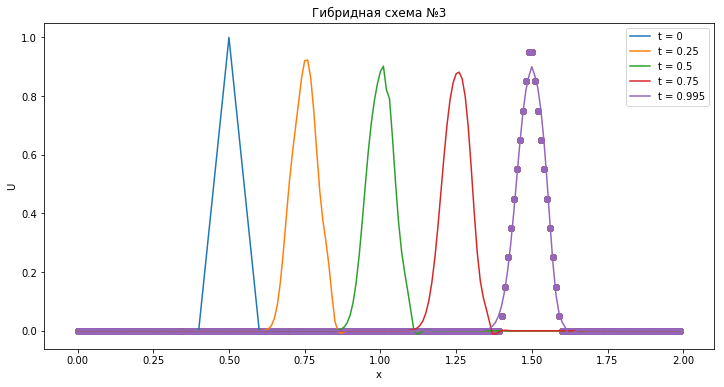

In [8]:
# Начальные и граничные условия
U = np.zeros((gridWidth,gridHeight))
U_1 = np.zeros((gridWidth,gridHeight))
U_2 = np.zeros((gridWidth,gridHeight))

for i in range(gridWidth):
    U[i][0] = U0(x[i])
    U_1[i][0] = U0(x[i])
    U_2[i][0] = U0(x[i])
    
for j in range(gridHeight):
    U[0][j] = U1(t[j])
    U_1[0][j] = U1(t[j])
    U_2[0][j] = U1(t[j])

# Схема1
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    U_1[i][1] = (1 - Q)*U_1[i][0] + Q*U_1[i-1][0]
    U_2[i][1] = (1 - Q)*U_2[i][0] + Q*U_2[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U_1[i][j+1] = U_1[i][j] + 1./3 *U_1[i-1][j] -1./3 *U_1[i][j-1]
        U_2[i][j+1] = a1*U_2[i][j] + a2*U_2[i-1][j] + a3*U_2[i][j-1] + a4*U_2[i-1][j+1]
        U[i][j+1] = Double_Hybrid(U[i-1][j], U_1[i][j+1], U[i][j], U_2[i][j+1])

plt.figure(figsize = (12,6))

# Рисунок1
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Гибридная схема №2')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

# Схема2
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    U_1[i][1] = (1 - Q)*U_1[i][0] + Q*U_1[i-1][0]
    U_2[i][1] = (1 - Q)*U_2[i][0] + Q*U_2[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U_1[i][j+1] = 2./5 * U_1[i][j] + 14./15 *U_1[i-1][j] - 1./30 * U_1[i][j-1] - 3./10 * U_1[i-1][j+1]
        U_2[i][j+1] = a1*U_2[i][j] + a2*U_2[i-1][j] + a3*U_2[i][j-1] + a4*U_2[i-1][j+1]
        U[i][j+1] = Double_Hybrid(U[i-1][j], U_1[i][j+1], U[i][j], U_2[i][j+1])

plt.figure(figsize = (12,6))

# Рисунок2
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Гибридная схема №3')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

## Гибридная схема с одновременным использованием двух схем второго порядка аппроксимации и схемы третьего порядка аппроксимации

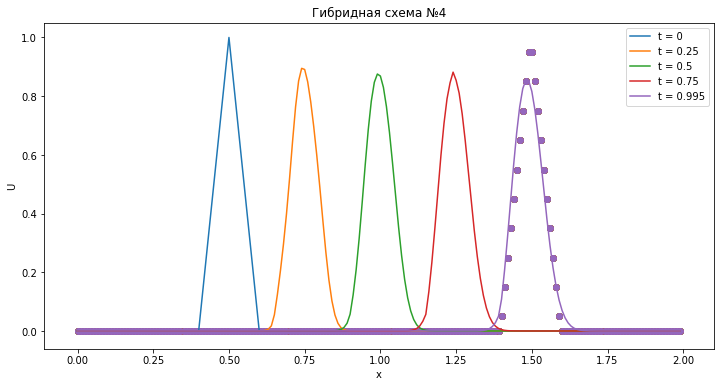

In [9]:
# Начальные и граничные условия
U = np.zeros((gridWidth,gridHeight))
U_1 = np.zeros((gridWidth,gridHeight))
U_2 = np.zeros((gridWidth,gridHeight))
U_3 = np.zeros((gridWidth,gridHeight))

for i in range(gridWidth):
    U[i][0] = U0(x[i])
    U_1[i][0] = U0(x[i])
    U_2[i][0] = U0(x[i])
    U_3[i][0] = U0(x[i])
    
for j in range(gridHeight):
    U[0][j] = U1(t[j])
    U_1[0][j] = U1(t[j])
    U_2[0][j] = U1(t[j])
    U_3[0][j] = U1(t[j])

# Схема1
for i in range(1, gridHeight - 1):
    U[i][1] = (1 - Q)*U[i][0] + Q*U[i-1][0]
    U_1[i][1] = (1 - Q)*U_1[i][0] + Q*U_1[i-1][0]
    U_2[i][1] = (1 - Q)*U_2[i][0] + Q*U_2[i-1][0]
    U_3[i][1] = (1 - Q)*U_3[i][0] + Q*U_3[i-1][0]
    
for i in range(1, gridWidth):
    for j in range(1, gridHeight - 1):
        U_1[i][j+1] = U_1[i][j] + 1./3 *U_1[i-1][j] -1./3 *U_1[i][j-1]
        U_2[i][j+1] = 2./5 * U_2[i][j] + 14./15 *U_2[i-1][j] - 1./30 * U_2[i][j-1] - 3./10 * U_2[i-1][j+1]
        U_3[i][j+1] = a1*U_3[i][j] + a2*U_3[i-1][j] + a3*U_3[i][j-1] + a4*U_3[i-1][j+1]
        U[i][j+1] = Triple_Hybrid(U[i-1][j], U_1[i][j+1], U[i][j], U_3[i][j+1], U_2[i][j+1])

plt.figure(figsize = (12,6))

# Рисунок1
for i in (0, 50, 100, 150, 199):
    plt.plot(x, U[:,i], label='t = %s'%t[i])
    plt.scatter(x, U_real)
    plt.legend(loc = 'best')
    plt.title(u'Гибридная схема №4')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()